# Data Visualization & Dimensionality Reduction

Created by Andres Segura-Tinoco  
Created on May 03, 2021

In [ ]:
# DS libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
# Plot libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## <span>1. Initial Exploration of IRIS data</span>

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  
https://archive.ics.uci.edu/ml/datasets/iris

In [ ]:
# import some data to play with
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# Showing some stats
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 1.1. Standardizing of the data

In [ ]:
X_std = StandardScaler().fit_transform(iris.data)
y = iris.target + 1

### 1.2. Plot standardized data

In [ ]:
# We only take the first two features to plot
X = X_std[:, :2]

# Calculate limits
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

In [ ]:
plt.cm.Set1(1)

(0.21568627450980393, 0.49411764705882355, 0.7215686274509804, 1.0)

In [ ]:
plt.cm.Set1(2)

(0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0)

In [ ]:
plt.cm.Set1(3)

(0.596078431372549, 0.3058823529411765, 0.6392156862745098, 1.0)

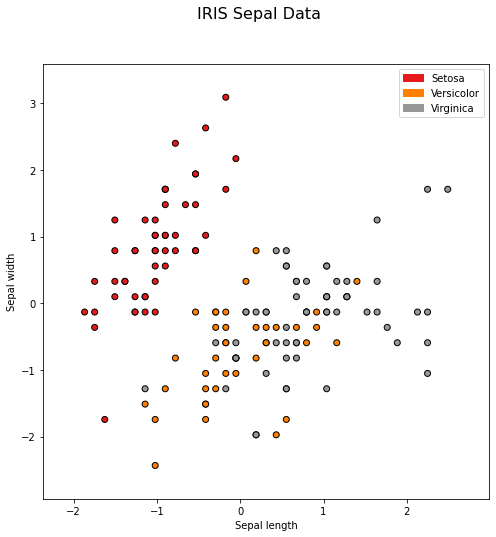

In [ ]:
# Plot the training points
fig, ax = plt.subplots(figsize = (8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.suptitle("IRIS Sepal Data", fontsize=16)

# Add legend
op1 = mpatches.Patch(color='#E41A1C', label='Setosa')
op2 = mpatches.Patch(color='#FF8000', label='Versicolor')
op3 = mpatches.Patch(color='#979797', label='Virginica')
plt.legend(handles=[op1, op2, op3], loc='best')

plt.show()

#### Result
Non-linearly separable data.

## <span>2. Dimensionality Reduction</span>


### 2.1. Principal Component Analysis (PCA)

In [ ]:
# Apply PCA (unsupervised learning)
pca = PCA(n_components=4)
pca_data = pca.fit_transform(X_std)

In [ ]:
# Show variance explained by each component (eigenvalues)
list(pca.explained_variance_ratio_)

[0.7296244541329987,
 0.2285076178670178,
 0.036689218892828765,
 0.005178709107154797]

In [ ]:
# Get eigenvectors
eigenvectors = pca.components_
eigenvectors

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [ ]:
# Calculate limits
x_min, x_max = pca_data[:, 0].min() - .5, pca_data[:, 0].max() + .5
y_min, y_max = pca_data[:, 1].min() - .5, pca_data[:, 1].max() + .5

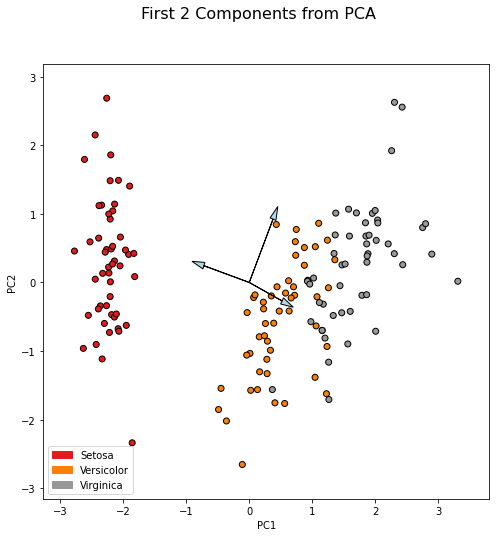

In [ ]:
# Plot first 2 Components
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
for i in range(3):
  x2, y2, _, _ = eigenvectors[i]
  ax.arrow(0, 0, x2, y2, head_width=0.1, head_length=0.2, fc='lightblue', ec='black')

plt.xlim(x_min,x_max)
plt.ylim(y_min, y_max)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.suptitle("First 2 Components from PCA", fontsize=16)
plt.legend(handles=[op1, op2, op3], loc='best')
plt.show()

#### Bonus: 3D plot

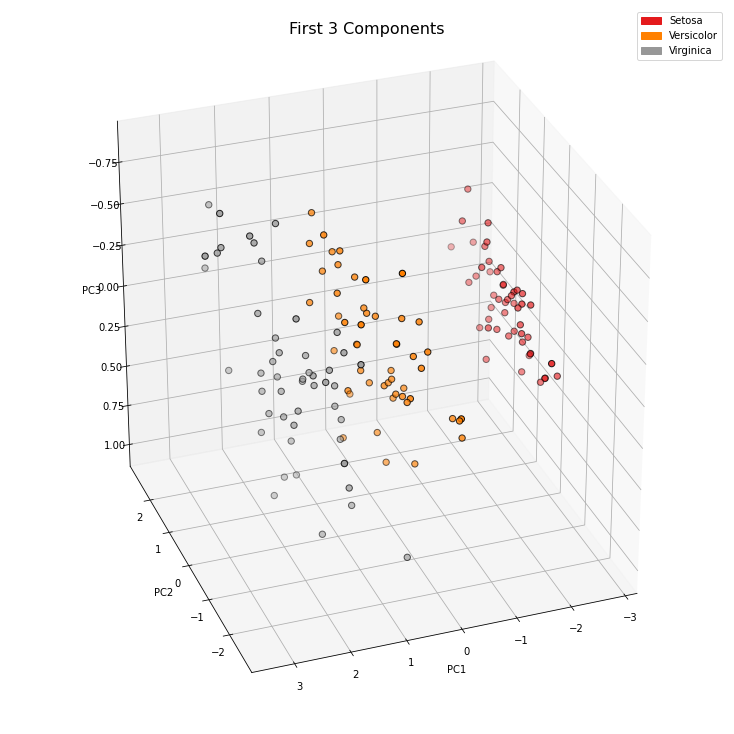

In [ ]:
# Plot first 3 Components
fig = plt.figure(2, figsize=(10, 10))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.suptitle("First 3 Components", fontsize=16)
plt.legend(handles=[op1, op2, op3], loc='best')
plt.show()

#### Result
Linear separable data.

### 2.2. Linear Discriminant Analysis (LDA)

In [ ]:
# Apply LDA (supervised learning)
lda = LDA(n_components=2)
lda_data = lda.fit_transform(X_std, y)

In [ ]:
# Show variance explained by each component
list(lda.explained_variance_ratio_)

[0.9912126049653671, 0.008787395034632795]

In [ ]:
# Calculate limits
x_min, x_max = lda_data[:, 0].min() - .5, lda_data[:, 0].max() + .5
y_min, y_max = lda_data[:, 1].min() - .5, lda_data[:, 1].max() + .5

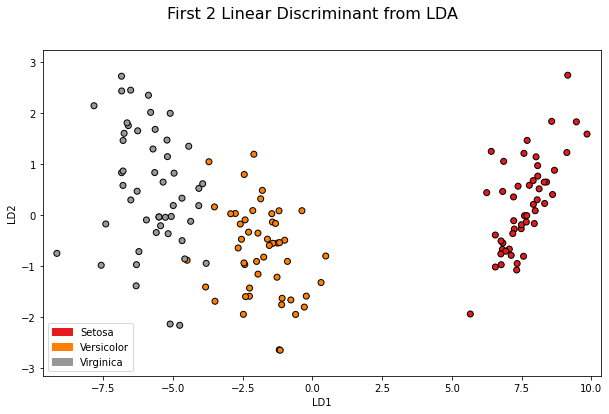

In [ ]:
# Plot first 2 Components
fig = plt.figure(2, figsize=(10, 6))
plt.scatter(lda_data[:, 0], lda_data[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.suptitle("First 2 Linear Discriminant from LDA", fontsize=16)
plt.legend(handles=[op1, op2, op3], loc='best')
plt.show()

#### Result
Linear separable data too.

## <span>3. Understanding the Results of the PCA</span>

In [ ]:
# Create and show principal components DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=["PC1", "PC2", "PC3", "PC4"])
pca_df

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


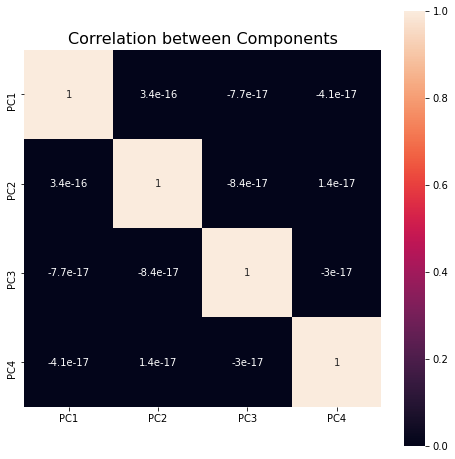

In [ ]:
# Show correlation between components
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(pca_df.corr(), square=True, annot=True)
ax.set_title("Correlation between Components", fontsize = 16)
plt.show()

#### Result
There is no correlation, because the principal components are orthogonal.

In [ ]:
# Create horizontal bar chart data
bars = ("PC1", "PC2", "PC3", "PC4")
y_pos = np.arange(len(bars))
values = pca.explained_variance_ratio_ * 100
cum = np.cumsum(values)

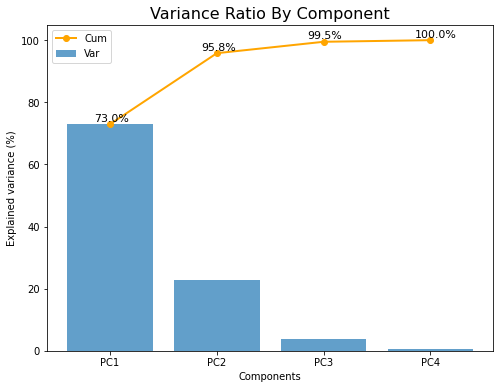

In [ ]:
# Plot Pareto chart
fig, ax2 = plt.subplots(figsize = (8, 6))

plt.bar(y_pos, values, align="center", alpha=0.7)
plt.xticks(y_pos, bars)
plt.plot(y_pos, cum, color="orange", linewidth=2, marker="o")

# Add bar labels
for i, v in enumerate(cum):
    ax2.text(i - .15, v + 1, (str(round(v, 1))+"%"), color="black", fontweight="normal", fontsize=11)

plt.xlabel("Components")
plt.ylabel("Explained variance (%)")
plt.title("Variance Ratio By Component", fontsize=16)
plt.legend(("Cum", "Var"), loc="best")
plt.show()

#### Result
In the first 2 PCs, 95.8% of the explained variance is found.

<hr>
You can contact me on <a href="https://twitter.com/SeguraAndres7" target="_blank">Twitter</a> | <a href="https://github.com/ansegura7/" target="_blank">GitHub</a> | <a href="https://www.linkedin.com/in/andres-segura-tinoco/" target="_blank">LinkedIn</a>